<a href="https://colab.research.google.com/github/rafaelnduarte/Customers_NLP/blob/master/Understanding_Your_Customers_With_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding Your Customers With NLP

[![LinkedIn](https://img.shields.io/badge/LinkedIn-rafaelnduarte-blue.svg)](https://www.linkedin.com/in/rafael-n-duarte)
[![GitHub](https://img.shields.io/badge/GitHub-rafaelnduarte-purple.svg)](https://github.com/rafaelnduarte)

This is one of the three notebooks on my Customer Segmentation project. To understand the process of acquiring and cleaning the data, please, visit the **Time Series** part of the project. 

<center><img width="60%" src="https://image.freepik.com/free-vector/group-people-with-speech-bubbles_24877-56560.jpg"></center>


Make sure you check out the other parts:
>* [Sales Forecast with Prophet]('https://colab.research.google.com/drive/1jHJ0T7nWFHE1tH9Xh2xMNbjoL8vhls9q#scrollTo=ZPn6kd81WlrQ')
* [RFM Customer Segmentation - K-Means]('https://colab.research.google.com/drive/1NEpuPYEtRo2rV80NU-DhgQ4OBbP4aAic#scrollTo=xdXJsuFJIJ74')

In [0]:
#@title Importing Packages
# importing the necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date
import datetime as dt
from datetime import timedelta
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import Holt
import scipy.stats as scs

import warnings
warnings.filterwarnings("ignore")
sns.set_style()
%matplotlib inline

# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# importing the dataset
path = ('https://www.dropbox.com/s/gotbas8az85ewg4/df_clean.csv?dl=1')
df_clean = pd.read_csv(path, encoding='latin-1')

df_clean.index = pd.to_datetime(df_clean['InvoiceDate'], infer_datetime_format=True)

df_clean.drop('InvoiceDate', axis=1, inplace=True)

,InvoiceDate,Description,Country
0,2010-12-01 08:26:00,white hanging heart t-light holder,United Kingdom
1,2010-12-01 08:26:00,white metal lantern,United Kingdom
2,2010-12-01 08:26:00,cream cupid hearts coat hanger,United Kingdom
3,2010-12-01 08:26:00,knitted union flag hot water bottle,United Kingdom
4,2010-12-01 08:26:00,red woolly hottie white heart.,United Kingdom


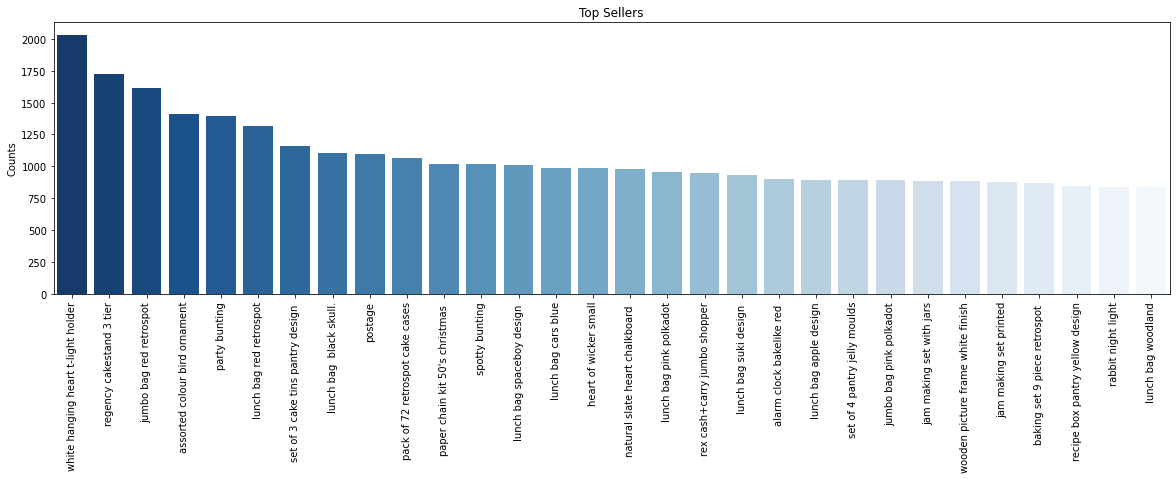

In [0]:
# checking Top Selling Products
description_counts = df_clean.Description.value_counts().sort_values(ascending=False).iloc[0:30]
plt.figure(figsize=(20,5))
sns.barplot(description_counts.index, description_counts.values, palette='Blues_r')
plt.ylabel("Counts")
plt.title("Top Sellers");
plt.xticks(rotation=90);

## NLP

Here, we're going to analyze the descriptions of the products to better understand what exactly the store is selling, and what we can learn from it.

In [0]:
# importing necessary packages
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [0]:
# creating a df for the tasks we're about to perform
df_nlp = df_clean[['Description', 'Country']].copy()
df_nlp.head()

,Description,Country
InvoiceDate,,
2010-12-01 08:26:00,white hanging heart t-light holder,United Kingdom
2010-12-01 08:26:00,white metal lantern,United Kingdom
2010-12-01 08:26:00,cream cupid hearts coat hanger,United Kingdom
2010-12-01 08:26:00,knitted union flag hot water bottle,United Kingdom
2010-12-01 08:26:00,red woolly hottie white heart.,United Kingdom


In [0]:
# preparing words for wordcloud
all_descriptions = " ".join(d for d in df_nlp['Description'])

# stopwords
stopwords = set(STOPWORDS)
stopwords.update(["red","blue", "green", "white", "black","pink"])


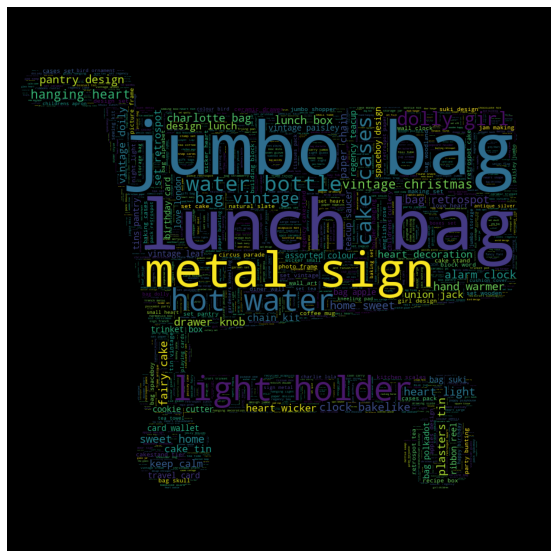

In [0]:
# creating a mask
ecommerce_mask = np.array(Image.open("/content/cart_inverted.png"))

# creating a new wordcloud
wordcloud=WordCloud(stopwords=stopwords,
                    background_color="black",
                    width=1000, height=1000, max_words=2000,
                    mask=ecommerce_mask, max_font_size=200,
                    min_font_size=1).generate(all_descriptions)

# plotting the wordcloud
fig, ax = plt.subplots(figsize=(10,10));
ax.imshow(wordcloud, interpolation='bilinear');
ax.set_axis_off();

plt.imshow(wordcloud);
wordcloud.to_file('cart_wordcloud.png')

### Top Selling Items by Country

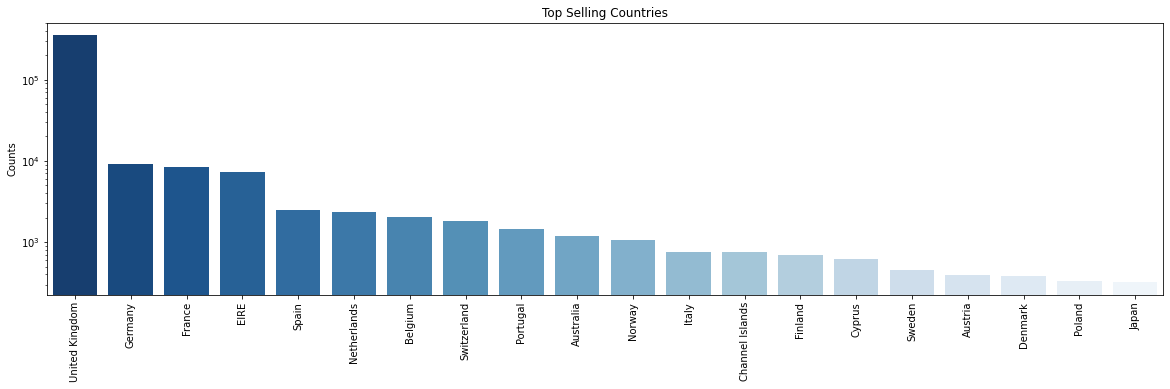

In [0]:
# top selling countries
country_counts = df_clean.Country.value_counts().sort_values(ascending=False).iloc[0:20]
plt.figure(figsize=(20,5))
sns.barplot(country_counts.index, country_counts.values, palette="Blues_r")
plt.ylabel("Counts")
plt.title("Top Selling Countries");
plt.xticks(rotation=90);
plt.yscale("log")

In [0]:
# preparing the data
countries = df_nlp.groupby('Country')

# separating the data by country
uk = countries.get_group('United Kingdom')
ger = countries.get_group('Germany')
fra = countries.get_group('France')

# preparing words for wordcloud
uk_descriptions = " ".join(d for d in uk['Description'])
ger_descriptions = " ".join(d for d in ger['Description'])
fra_descriptions = " ".join(d for d in fra['Description'])

### Top Selling Products in the UK

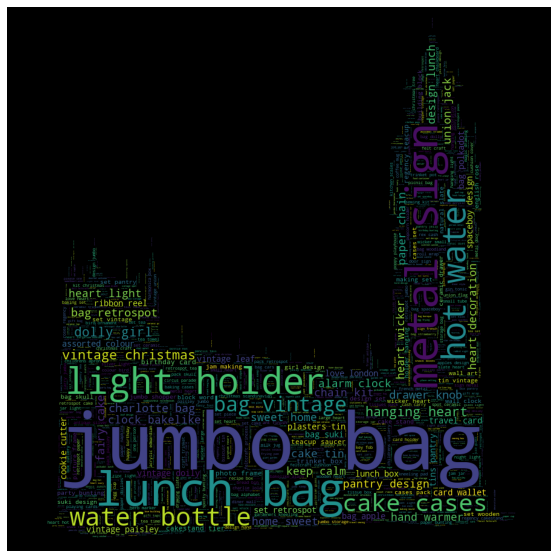

In [0]:
# UK wordcloud
# creating a mask
uk_mask = np.array(Image.open("/content/london_bg.png"))

# creating a new wordcloud
wordcloud=WordCloud(stopwords=stopwords,
                    background_color="black",
                    width=1000, height=1000, max_words=2000,
                    mask=uk_mask, max_font_size=200,
                    min_font_size=1).generate(uk_descriptions)

# plotting the wordcloud
fig, ax = plt.subplots(figsize=(10,10));
ax.imshow(wordcloud, interpolation='bilinear');
ax.set_axis_off();

plt.imshow(wordcloud);
wordcloud.to_file('uk_wordcloud.png')

### Germany Wordcloud

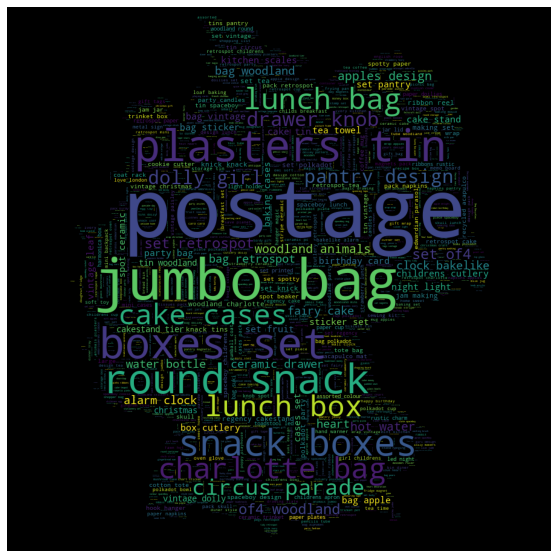

In [0]:
# Germany wordcloud
# creating a mask
ger_mask = np.array(Image.open("/content/berlin_bg.png"))

# creating a new wordcloud
wordcloud=WordCloud(stopwords=stopwords,
                    background_color="black",
                    width=1000, height=1000, max_words=2000,
                    mask=ger_mask, max_font_size=200,
                    min_font_size=1).generate(ger_descriptions)

# plotting the wordcloud
fig, ax = plt.subplots(figsize=(10,10));
ax.imshow(wordcloud, interpolation='bilinear');
ax.set_axis_off();

plt.imshow(wordcloud);
wordcloud.to_file('ger_wordcloud.png')

### France Wordcloud

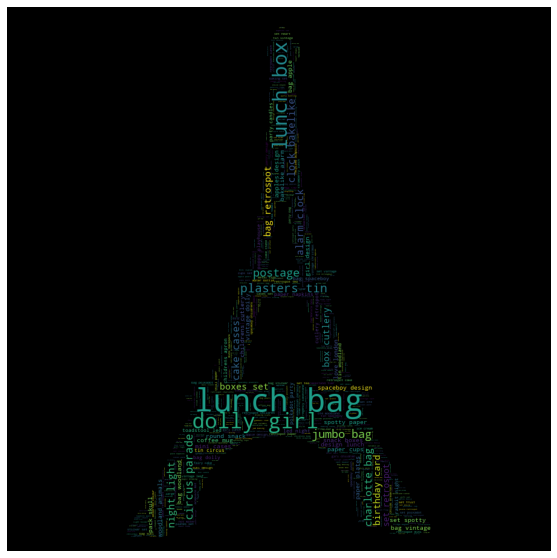

In [0]:
# France wordcloud
# creating a mask
fra_mask = np.array(Image.open("/content/eiffel_bg.png"))

# creating a new wordcloud
wordcloud=WordCloud(stopwords=stopwords,
                    background_color="black",
                    width=1000, height=1000, max_words=2000,
                    mask=fra_mask, max_font_size=200,
                    min_font_size=1).generate(fra_descriptions)

# plotting the wordcloud
fig, ax = plt.subplots(figsize=(10,10));
ax.imshow(wordcloud, interpolation='bilinear');
ax.set_axis_off();

plt.imshow(wordcloud);
wordcloud.to_file('france_wordcloud.png')

# Thank You!

Thank you for your time and attention. I hope this was an informative and interesting project. Should you have any questions or any kind of feedback, feel free to contact me on [LinkedIn](https://www.linkedin.com/in/rafael-n-duarte/), and check out my other projects on [GitHub](https://github.com/rafaelnduarte/portfolio).


[![LinkedIn](https://img.shields.io/badge/LinkedIn-rafaelnduarte-blue.svg)](https://www.linkedin.com/in/rafael-n-duarte)
[![GitHub](https://img.shields.io/badge/GitHub-rafaelnduarte-purple.svg)](https://github.com/rafaelnduarte)

<center><img width="90%" src="https://github.com/rafaelnduarte/Portfolio/blob/master/rafaelnd_banner.png?raw=true"></center>